<a href="https://colab.research.google.com/github/andreYoo/Time-series-analysis-anomaly-detection/blob/main/%ED%95%AD%EB%A1%9C%ED%91%9C%EC%A7%80%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B2%B0%EC%B8%A1%EC%B9%98%EB%B3%B4%EA%B0%84_%ED%8F%89%ED%99%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import pandas as pd # 판다스 호출 
import numpy as np  # 넘파이 호출 
import torch 
import statsmodels.api as sm # statsmodels 호출 
import seaborn as sns # 그래프를 그리기위한 Seaborn 호출 
from statsmodels.tsa.seasonal import seasonal_decompose # 데이터 필터 라이러리 호출 
import matplotlib.pyplot as plt

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [62]:
dataframe = pd.read_csv('./drive/MyDrive/study/tmp_TB_STATUS.csv')
raw_data = dataframe.values
dataframe.head()

,Unnamed: 0,MMAF_CODE,MMSI,COLCT_DT,REG_ANS,COMM_TYPE,LATITUDE,LONGITUDE,INSTALL_DT,LANTERN_STATUS,RACON_STATUS,BATTERY_STATUS,CHARGER_STATUS,SOLAR_STATUS,DATALOGGER_STATUS,SPARE_STATUS,MAIN_VOLT_STATUS,SUB_VOLT_STATUS,SOLAR_VOLT_STATUS,WIND_VOLT_STATUS,WAVE_VOLT_STATUS,CHARGER_VOLT_STATUS,BATTERY_VOLT_STATUS,SPARE_VOLT_STATUS,AIS_CURR_STATUS,LANTERN_CURR_STATUS,DATALOGGER_CURR_STATUS,SPARE_CURR_STATUS,WIND_SPEED_STATUS,WIND_DIRECT_STATUS,AIR_TEMPER_STATUS,HUMIDITY_STATUS,DEW_POINT_STATUS,AIR_PRESSURE_STATUS,HORIZON_VISIBL_STATUS,WATER_LEVEL_STATUS,CURRENT1_STATUS,CURRENT2_STATUS,CURRENT3_STATUS,WAVE_HEIGHT_STATUS,WAVE_DRC_STATUS,SWELL_HEIGHT_STATUS,SWELL_DRC_STATUS,WATER_TEMPER_STATUS,PRECIPI_TYPE_STATUS,SALINITY_STATUS,ICE_STATUS,HEAT_PROSTR_STATUS,HELIOGRAPH_STATUS,OXYGEN_STATUS,OXYGEN_SATUR_STATUS,PH_STATUS,CHLOROPHYLL_STATUS,MUDDINESS_STATUS,PRECIPI_STATUS,CHARGER_CURR_STATUS,DISCHARGER_CURR_STATUS,VTS_ID,BASESTATION_ID,REGIST_USER_NO,REGIST_DT,UPDT_USER_NO,UPDT_DT
0,0,103,994403901,1.998030e+13,NaN,NaN,33.797717,126.322500,NaN,0,0,1,0.0,1.0,0.0,NaN,13.4,NaN,2.0,NaN,NaN,NaN,14.7,0.0,0.26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.87,NaN,NaN,NaN,NaN,NaN,NaN
1,1,104,994401597,2.014030e+13,NaN,NaN,35.066583,129.130850,NaN,0,2,1,0.0,1.0,0.0,NaN,10.5,NaN,0.0,NaN,NaN,NaN,10.2,0.0,0.16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.59,NaN,NaN,NaN,NaN,NaN,NaN
2,2,107,994402986,2.014020e+13,NaN,NaN,34.703650,125.837100,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,8.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,107,994402986,2.014020e+13,NaN,NaN,34.703667,125.837117,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,0.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,4,107,994402986,2.014020e+13,NaN,NaN,34.703667,125.837117,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,0.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN


1000    20.3
1001    20.3
1002    20.3
1003    20.3
1004    20.3
        ... 
2995     0.0
2996     0.0
2997     0.0
2998     0.0
2999     0.0
Name: SOLAR_VOLT_STATUS, Length: 2000, dtype: float64


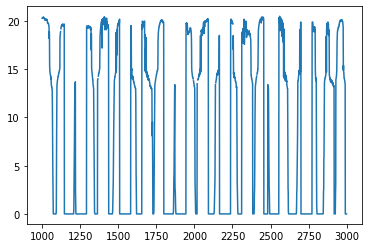

In [63]:
# The last element contains the labels

# The other data points are the electrocadriogram data
dataframe['SOLAR_VOLT_STATUS'][1000:3000].plot()

data = dataframe['SOLAR_VOLT_STATUS'][1000:3000].copy()
data[1200:1250] = np.nan
print(data)

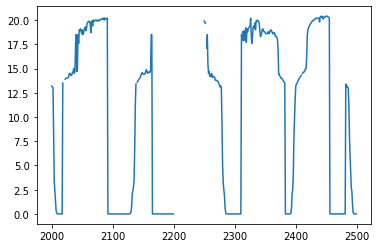

In [64]:

data[1000:1500].plot()

주요 Hyperparameter
methodstr, default linear Interpolation technique 지정

-linear: 색인을 무시하고 값을 동일한 간격으로 처리 (MultiIndexes에서 지원되는 유일한 방법)

time: 주어진 간격의 길이를 보간하기 위해 매일 더 높은 해상도 데이터를 처리

index, values: 인덱스의 실제 숫자 값을 사용

pad: 기존 값을 사용하여 NaN 채우기

nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial: scipy.interpolate.interp1d로 전달. 이 방법은 색인의 숫자 값을 사용. polynomial과 spline 모두 순서 (int)도 지정해야합니다 (예 : df.interpolate (method='polynomial', order=5).

krogh, piecewise_polynomial, spline, pchip, akima: 비슷한 이름의 SciPy 보간 방법을 둘러싼 Wrapper.

from_derivatives: scipy 0.18의 piecewise_polynomial보간 방법을 대체하는 scipy.interpolate.BPoly.from_derivatives를 참조

axis{0 or index, 1 or columns, None}, default None 보간할 축 설정

limitint, optional 채울 최대 연속 NaN 갯수. 0보다 커야함.

inplacebool, default False 데이터 업데이트 (if possible)

limit_direction{forward, backward, both}, default forward limit이 지정되면, 연속 NaN이 지정된 방향으로 채워집니다.

limit_area{None, inside, outside}, default None limit이 지정되면, 연속된 NaN은 지정된 제한(restriction)으로 채워집니다.

None: No fill restriction.

inside: 유효한 값으로 둘러싸인 NaN 만 채 웁니다 (보간).

outside: 유효 값을 초과하는 NaN 만 채 웁니다 (외삽).

(New in version 0.23.0.)

In [65]:
data_inter = pd.Series(data).interpolate(methods='zero')

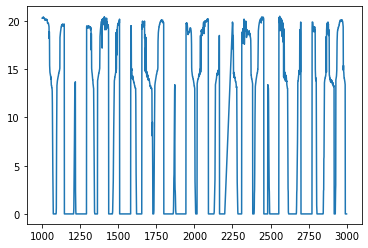

In [66]:
data_inter.plot()

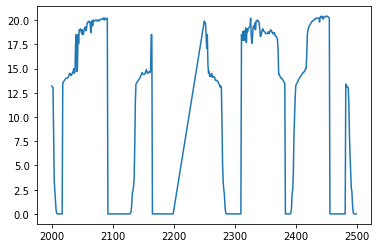

In [67]:
data_inter[1000:1500].plot()

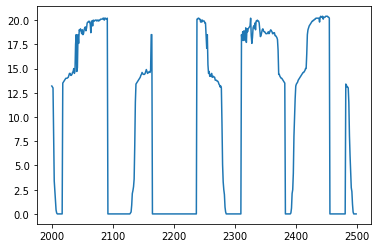

In [68]:
data = dataframe['SOLAR_VOLT_STATUS'][1000:3000].copy()
data_near = pd.Series(data).interpolate(methods='nearest')
data_near[1000:1500].plot()

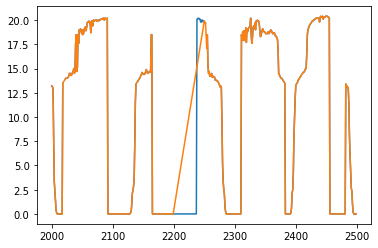

In [69]:
data = dataframe['SOLAR_VOLT_STATUS'][1000:3000]
data[1000:1500].plot()
data[1200:1250] = np.nan
data_zero = pd.Series(data).interpolate(methods='zero')
data_zero[1000:1500].plot()

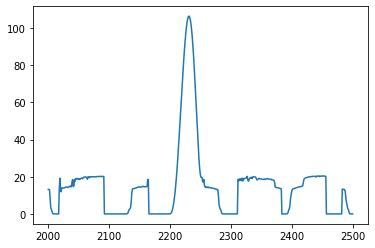

In [70]:
data = dataframe['SOLAR_VOLT_STATUS'][1000:3000]
data[1200:1250] = np.nan
data_poly = pd.Series(data).interpolate(method='polynomial', order=5)
data_poly[1000:1500].plot()